In [153]:
# import dependencies

import pandas as pd
import keras
from sklearn.preprocessing import MinMaxScaler
import pandas_ta
import datetime as dt
import seaborn as sns
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Activation
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [4]:
# Read csv
data = pd.read_csv('QQQ.csv')

# Changed to date time data type 
data['Date'] = pd.to_datetime(data['Date'])
data = data.set_index("Date")
data.index

DatetimeIndex(['1999-03-10', '1999-03-11', '1999-03-12', '1999-03-15',
               '1999-03-16', '1999-03-17', '1999-03-18', '1999-03-19',
               '1999-03-22', '1999-03-23',
               ...
               '2022-06-13', '2022-06-14', '2022-06-15', '2022-06-16',
               '2022-06-17', '2022-06-21', '2022-06-22', '2022-06-23',
               '2022-06-24', '2022-06-27'],
              dtype='datetime64[ns]', name='Date', length=5864, freq=None)

  # Technical Indicators-
  ##### Are mathematical calculations plotted as chart patterns based on security's historic price, volume, or open interest in order to attempt to forecast future price movements and market direction. 
  ##### Indicators used in this model:
  ##### - Simple Moving Average (SMA) 
  ##### - Moving Average Convergance/Divergance (MACD)
  ##### - Commodity Channel Index (CCI)
  ##### - Bollinger Bands (bbands)
  ##### - Relative Strength Index (RSI)
  ##### - Volume-Weighted Average Price (VWAP)
  ##### - On-Balance Volume (OBV)

In [5]:
# Calculated Simple Moving Average (SMA), Moving Average Convergance/ DIvergance MACD, CCI, BOLLINGER BANDS, RSI, VWAP and OBV 

data['50-SMA'] = data.Close.rolling(window=50).mean()
data['100-SMA'] = data.Close.rolling(window=100).mean()
data['200-SMA'] = data.Close.rolling(window=200).mean()
macd = data.ta.macd(close='Close', fast=12, slow=26, signal=9, append=True)
cci = data.ta.cci(close='Close', length=20, append=True)
bbands = data.ta.bbands(close='Close', length=20, append=20)
rsi = data.ta.rsi(close='Close', length=14, append=True)
vwap = data.ta.vwap(append=True)
obv = data.ta.obv(append=True)

In [7]:
data

,Open,High,Low,Close,Adj Close,Volume,50-SMA,100-SMA,200-SMA,MACD_12_26_9,...,MACDs_12_26_9,CCI_20_0.015,BBL_20_2.0,BBM_20_2.0,BBU_20_2.0,BBB_20_2.0,BBP_20_2.0,RSI_14,VWAP_D,OBV
Date,,,,,,,,,,,,,,,,,,,,,
1999-03-10,51.125000,51.156250,50.281250,51.062500,44.090477,5232000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.833333,5.232000e+06
1999-03-11,51.437500,51.734375,50.312500,51.312500,44.306343,9688600,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.119792,1.492060e+07
1999-03-12,51.125000,51.156250,49.656250,50.062500,43.226997,8743600,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.291667,6.177000e+06
1999-03-15,50.437500,51.562500,49.906250,51.500000,44.468227,6369000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.989583,1.254600e+07
1999-03-16,51.718750,52.156250,51.156250,51.937500,44.846008,4905800,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.750000,1.745180e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-21,278.750000,283.450012,278.640015,281.079987,281.079987,51633700,308.804802,329.0833,355.22080,-8.826914,...,-7.121305,-72.559476,267.143905,294.476001,321.808097,18.563208,0.254940,41.089675,281.056671,5.298741e+09
2022-06-22,278.519989,285.179993,277.910004,280.670013,280.670013,67472900,307.435202,328.4790,354.71630,-8.618584,...,-7.420760,-65.872520,265.847554,293.835501,321.823448,19.050079,0.264801,40.884468,281.253337,5.231268e+09
2022-06-23,283.209991,285.720001,280.309998,284.850006,284.850006,57457800,306.314402,327.8095,354.23000,-8.023698,...,-7.541348,-52.223160,265.596334,293.716002,321.835670,19.147522,0.342352,43.957597,283.626668,5.288726e+09


In [8]:
# Drop null values
data = data.dropna(how='any')

In [9]:
data

,Open,High,Low,Close,Adj Close,Volume,50-SMA,100-SMA,200-SMA,MACD_12_26_9,...,MACDs_12_26_9,CCI_20_0.015,BBL_20_2.0,BBM_20_2.0,BBU_20_2.0,BBB_20_2.0,BBP_20_2.0,RSI_14,VWAP_D,OBV
Date,,,,,,,,,,,,,,,,,,,,,
1999-12-21,85.125000,89.437500,84.640625,89.437500,77.225800,26003800,71.722656,65.835156,60.100664,3.781195,...,3.282820,233.380598,72.379416,79.607813,86.836209,18.160019,1.179936,80.970862,87.838542,4.742716e+08
1999-12-22,89.187500,89.312500,87.437500,89.156250,76.982918,22313600,72.242031,66.162344,60.291133,4.055447,...,3.437345,205.578130,72.306743,80.317188,88.327632,19.947024,1.051721,79.735557,88.635417,4.519580e+08
1999-12-23,89.867188,90.750000,89.000000,90.218750,77.900360,17543600,72.820156,66.503828,60.485664,4.308858,...,3.611648,185.626067,71.985002,80.956250,89.927498,22.163200,1.016233,80.919822,89.989583,4.695016e+08
1999-12-27,90.312500,90.343750,87.906250,89.687500,77.441666,19281800,73.380000,66.850156,60.683789,4.415918,...,3.772502,141.089612,71.956600,81.556250,91.155900,23.541176,0.923518,78.451123,89.312500,4.502198e+08
1999-12-28,89.750000,90.500000,88.562500,89.125000,76.955910,15346400,73.965000,67.182109,60.871914,4.404600,...,3.898922,121.623757,72.359166,82.192188,92.025209,23.926901,0.852527,75.813762,89.395833,4.348734e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-21,278.750000,283.450012,278.640015,281.079987,281.079987,51633700,308.804802,329.083300,355.220800,-8.826914,...,-7.121305,-72.559476,267.143905,294.476001,321.808097,18.563208,0.254940,41.089675,281.056671,5.298741e+09
2022-06-22,278.519989,285.179993,277.910004,280.670013,280.670013,67472900,307.435202,328.479000,354.716300,-8.618584,...,-7.420760,-65.872520,265.847554,293.835501,321.823448,19.050079,0.264801,40.884468,281.253337,5.231268e+09
2022-06-23,283.209991,285.720001,280.309998,284.850006,284.850006,57457800,306.314402,327.809500,354.230000,-8.023698,...,-7.541348,-52.223160,265.596334,293.716002,321.835670,19.147522,0.342352,43.957597,283.626668,5.288726e+09


In [10]:
# find the pairwise correlation of all columns in the dataframe.
cor = data.corr()
cor

,Open,High,Low,Close,Adj Close,Volume,50-SMA,100-SMA,200-SMA,MACD_12_26_9,...,MACDs_12_26_9,CCI_20_0.015,BBL_20_2.0,BBM_20_2.0,BBU_20_2.0,BBB_20_2.0,BBP_20_2.0,RSI_14,VWAP_D,OBV
Open,1.000000,0.999926,0.999892,0.999819,0.999597,-0.367264,0.996744,0.993464,0.986851,0.197156,...,0.216185,0.084535,0.998568,0.998757,0.997562,-0.100989,0.083860,0.120183,0.999920,0.642483
High,0.999926,1.000000,0.999837,0.999891,0.999641,-0.365417,0.997114,0.993945,0.987433,0.192752,...,0.212154,0.082697,0.998558,0.998962,0.997963,-0.096579,0.082609,0.117964,0.999951,0.640478
Low,0.999892,0.999837,1.000000,0.999903,0.999724,-0.370262,0.996330,0.992968,0.986289,0.201434,...,0.219335,0.089418,0.998515,0.998468,0.997057,-0.105930,0.089317,0.125651,0.999954,0.645056
Close,0.999819,0.999891,0.999903,1.000000,0.999778,-0.368205,0.996642,0.993364,0.986746,0.197657,...,0.215866,0.087621,0.998468,0.998641,0.997432,-0.101285,0.088565,0.123944,0.999972,0.642895
Adj Close,0.999597,0.999641,0.999724,0.999778,1.000000,-0.360955,0.996612,0.993513,0.987259,0.195365,...,0.213434,0.086235,0.998408,0.998494,0.997204,-0.103687,0.087170,0.122018,0.999755,0.643009
Volume,-0.367264,-0.365417,-0.370262,-0.368205,-0.360955,1.000000,-0.348825,-0.342600,-0.336195,-0.271645,...,-0.245544,-0.304352,-0.363758,-0.356338,-0.349056,0.247688,-0.305183,-0.365453,-0.367963,-0.294615
50-SMA,0.996744,0.997114,0.996330,0.996642,0.996612,-0.348825,1.000000,0.998542,0.993882,0.120085,...,0.144079,0.043100,0.997026,0.998777,0.999012,-0.073904,0.043497,0.071572,0.996738,0.632521
100-SMA,0.993464,0.993945,0.992968,0.993364,0.993513,-0.342600,0.998542,1.000000,0.997663,0.096845,...,0.116139,0.037689,0.993410,0.995920,0.996854,-0.057554,0.038116,0.060419,0.993469,0.622872
200-SMA,0.986851,0.987433,0.986289,0.986746,0.987259,-0.336195,0.993882,0.997663,1.000000,0.071990,...,0.088836,0.030781,0.986803,0.989970,0.991514,-0.038953,0.031103,0.049964,0.986866,0.608110
MACD_12_26_9,0.197156,0.192752,0.201434,0.197657,0.195365,-0.271645,0.120085,0.096845,0.071990,1.000000,...,0.953526,0.476575,0.179240,0.160019,0.142200,-0.352382,0.473703,0.593170,0.197266,0.225718


In [11]:
# find the correlation for 'Close' only
cor['Close']


Open             0.999819
High             0.999891
Low              0.999903
Close            1.000000
Adj Close        0.999778
Volume          -0.368205
50-SMA           0.996642
100-SMA          0.993364
200-SMA          0.986746
MACD_12_26_9     0.197657
MACDh_12_26_9   -0.015464
MACDs_12_26_9    0.215866
CCI_20_0.015     0.087621
BBL_20_2.0       0.998468
BBM_20_2.0       0.998641
BBU_20_2.0       0.997432
BBB_20_2.0      -0.101285
BBP_20_2.0       0.088565
RSI_14           0.123944
VWAP_D           0.999972
OBV              0.642895
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Upper Bollinger Band'}, xlabel='Open', ylabel='BBU_20_2.0'>

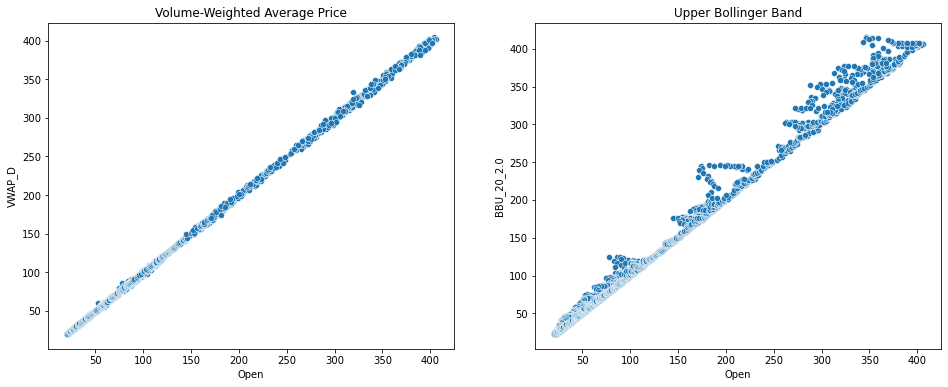

In [163]:
# Visualize good Correlation

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,6))

ax1.set_title('Volume-Weighted Average Price')
sns.scatterplot(x='Open', y='VWAP_D', data=data, ax=ax1)

ax2.set_title('Upper Bollinger Band')
sns.scatterplot(x='Open', y='BBU_20_2.0', data=data, ax=ax2)


<AxesSubplot:title={'center':'100-Simple Moving Average '}, xlabel='Open', ylabel='100-SMA'>

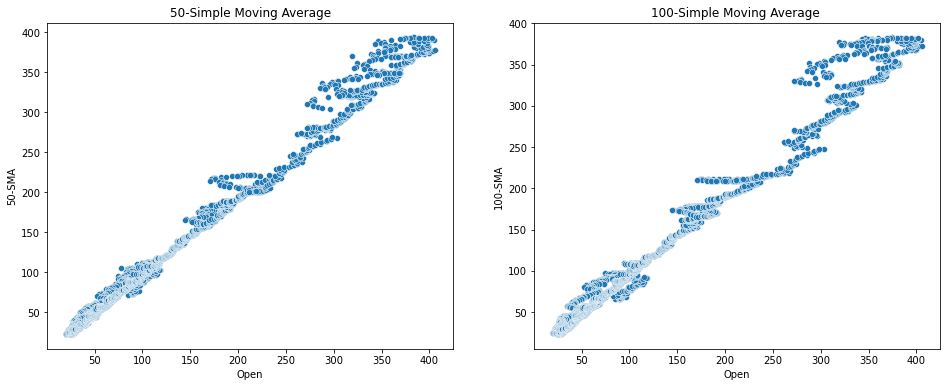

In [164]:
# Visualize good correlation

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,6))

ax1.set_title('50-Simple Moving Average')
sns.scatterplot(x='Open', y='50-SMA', data=data, ax=ax1)

ax2.set_title('100-Simple Moving Average ')
sns.scatterplot(x='Open', y='100-SMA', data=data, ax=ax2)

<AxesSubplot:title={'center':'Relative Strength Index '}, xlabel='Open', ylabel='RSI_14'>

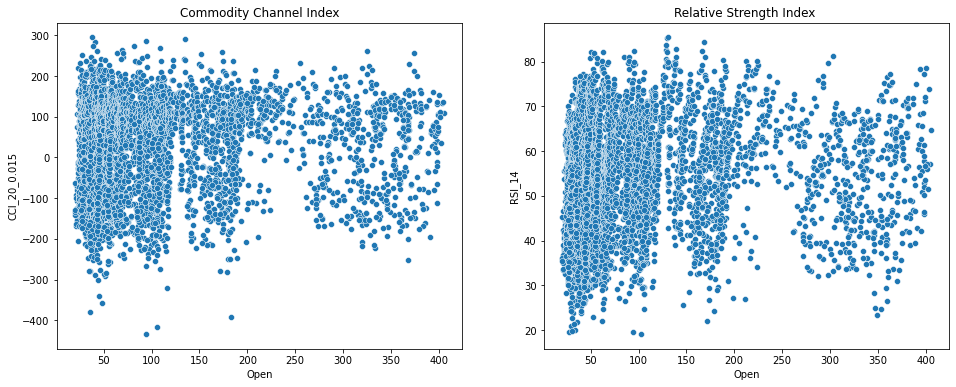

In [165]:
# Visualize bad correlation

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,6))

ax1.set_title('Commodity Channel Index')
sns.scatterplot(x='Open', y='CCI_20_0.015', data=data, ax=ax1)

ax2.set_title('Relative Strength Index ')
sns.scatterplot(x='Open', y='RSI_14', data=data, ax=ax2)

# Neural Netwok using Keras

In [14]:


# from last 30 days we want to predict the next 20 days 
n_steps_in, n_steps_out = 30, 20

# Save all data we have the correlation with the close 
in0 = data['50-SMA'].values
in1 = data['100-SMA'].values
in2 = data['200-SMA'].values
in3 = data['BBL_20_2.0'].values
in4 = data['BBM_20_2.0'].values
in5 = data['BBU_20_2.0'].values
in6 = data['VWAP_D'].values
out = data['Close'].values


In [15]:
# Reshape data for right shape for model.

in0 = in0.reshape((len(in0), 1))
in1 = in1.reshape((len(in1), 1))
in2 = in2.reshape((len(in2), 1))
in3 = in3.reshape((len(in3), 1))
in4 = in4.reshape((len(in4), 1))
in5 = in5.reshape((len(in5), 1))
in6 = in6.reshape((len(in6), 1))
out = out.reshape((len(out), 1))

In [16]:
# scale the data for model

scaler = MinMaxScaler(feature_range=(0,1))

in0_scaled = scaler.fit_transform(in0)
in1_scaled = scaler.fit_transform(in1)
in2_scaled = scaler.fit_transform(in2)
in3_scaled = scaler.fit_transform(in3)
in4_scaled = scaler.fit_transform(in4)
in5_scaled = scaler.fit_transform(in5)
in6_scaled = scaler.fit_transform(in6)
out_scaled = scaler.fit_transform(out)

In [17]:
# stack data 

stacked = np.hstack((in0_scaled, in1_scaled, in2_scaled, in3_scaled, in4_scaled, in5_scaled, in6_scaled, out_scaled))

### Association of independent and dependent variables

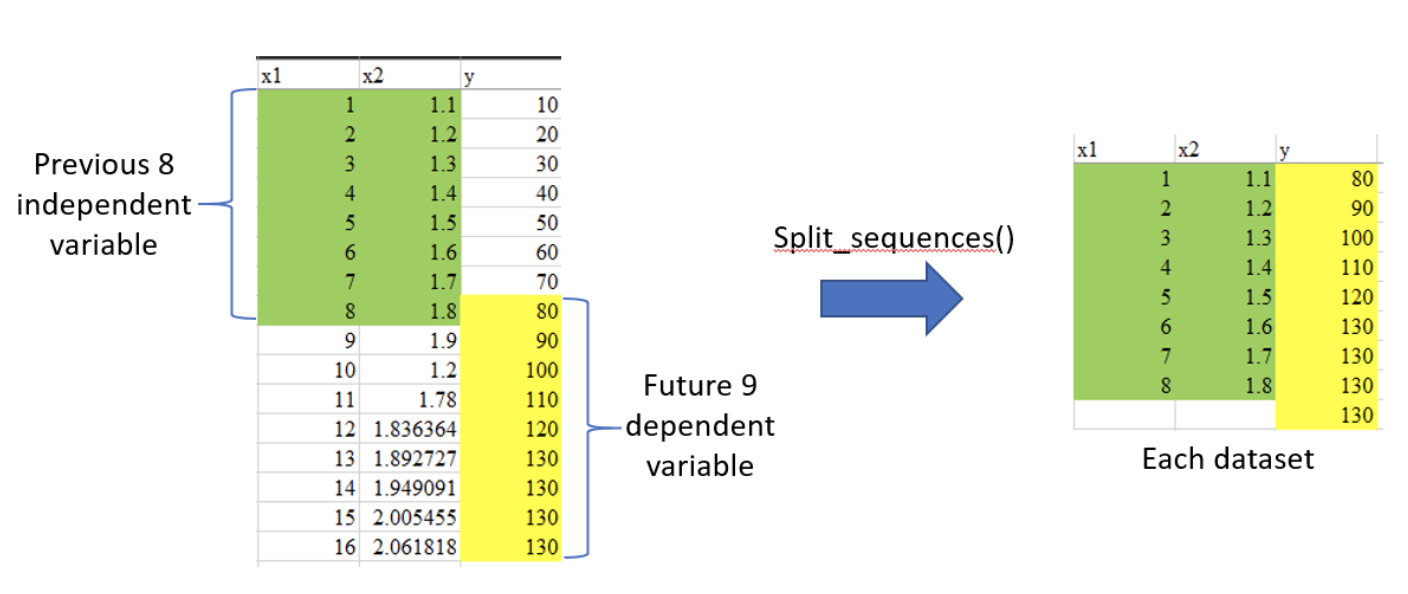



In [18]:
# Split sequences, shift the dependent variable.

def split_sequences(sequences, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequences)):
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out - 1
        if out_end_ix > len(sequences):
            break
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1:out_end_ix, -1]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [19]:
# Split sequences, shift the dependent variable to create X and Y 
X, y = split_sequences(stacked, n_steps_in, n_steps_out)

# Define Model

In [91]:
# define learning rate

opt = keras.optimizers.Adam(learning_rate=0.00007)

In [21]:
# Access shape
n_features = X.shape[2]

In [97]:
# Model set up 

model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
model.add(LSTM(10, activation='relu'))
model.add(Dense(n_steps_out))
model.compile(loss='mse', optimizer=opt, metrics=['mse'])

In [23]:
# split data into train and test

splitPoint = int(len(X)*0.75)
x_train, y_train = X[:splitPoint, :], y[:splitPoint, :]
x_test, y_test = X[splitPoint:, :], y[splitPoint:, :]

In [98]:
# fit the model

history = model.fit(x_train, y_train, batch_size=32, 
                    epochs=45, steps_per_epoch=100, 
                    verbose=1, validation_data=(x_test, y_test),
                    shuffle=False)

Epoch 1/100
100/100 [==============================] - 4s 23ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 1.1978 - val_mse: 1.1978
Epoch 2/100
100/100 [==============================] - 2s 20ms/step - loss: 0.0064 - mse: 0.0064 - val_loss: 0.1869 - val_mse: 0.1869
Epoch 3/100
100/100 [==============================] - 2s 19ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.1409 - val_mse: 0.1409
Epoch 4/100
100/100 [==============================] - 2s 20ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.4656 - val_mse: 0.4656
Epoch 5/100
100/100 [==============================] - 2s 20ms/step - loss: 7.9003e-04 - mse: 7.9003e-04 - val_loss: 0.1011 - val_mse: 0.1011
Epoch 6/100
100/100 [==============================] - 2s 20ms/step - loss: 0.0027 - mse: 0.0027 - val_loss: 0.0977 - val_mse: 0.0977
Epoch 7/100
100/100 [==============================] - 2s 22ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 0.0817 - val_mse: 0.0817
Epoch 8/100
100/100 [==============================] -

100/100 [==============================] - 2s 20ms/step - loss: 1.6974e-04 - mse: 1.6974e-04 - val_loss: 0.0557 - val_mse: 0.0557
Epoch 60/100
100/100 [==============================] - 2s 21ms/step - loss: 1.8377e-04 - mse: 1.8377e-04 - val_loss: 0.0584 - val_mse: 0.0584
Epoch 61/100
100/100 [==============================] - 2s 22ms/step - loss: 1.9311e-04 - mse: 1.9311e-04 - val_loss: 0.0567 - val_mse: 0.0567
Epoch 62/100
100/100 [==============================] - 2s 22ms/step - loss: 7.0831e-05 - mse: 7.0831e-05 - val_loss: 0.0337 - val_mse: 0.0337
Epoch 63/100
100/100 [==============================] - 2s 21ms/step - loss: 1.5699e-04 - mse: 1.5699e-04 - val_loss: 0.0597 - val_mse: 0.0597
Epoch 64/100
100/100 [==============================] - 2s 21ms/step - loss: 1.7449e-04 - mse: 1.7449e-04 - val_loss: 0.0626 - val_mse: 0.0626
Epoch 65/100
100/100 [==============================] - 2s 22ms/step - loss: 1.8323e-04 - mse: 1.8323e-04 - val_loss: 0.0646 - val_mse: 0.0646
Epoch 66/100

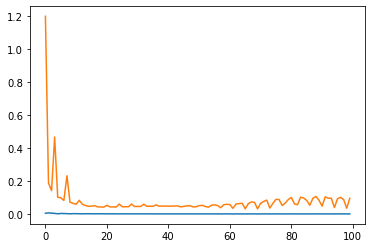

In [99]:
# visualize the training of the model
# Blue is loss of train data
# Orange testing data, make sure it comes down to meet training data

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [100]:
# New current data that model has not seen through training, used to predict future closing prices in the next 20 days

data1 = pd.read_csv('QQQ1.csv')
data1

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-07-19,354.049988,355.179993,352.040009,354.670013,352.710419,64404600
1,2021-07-20,355.630005,360.279999,353.799988,358.790009,356.807648,42183700
2,2021-07-21,358.350006,361.559998,358.119995,361.559998,359.562347,30259900
3,2021-07-22,361.769989,363.959991,361.769989,363.950012,361.939117,30252200
4,2021-07-23,365.309998,368.489990,363.920013,368.200012,366.165649,31960800
...,...,...,...,...,...,...,...
247,2022-07-12,290.320007,292.279999,284.609985,286.239990,286.239990,55797100
248,2022-07-13,280.600006,288.049988,280.019989,285.649994,285.649994,73939400
249,2022-07-14,282.989990,287.559998,279.799988,286.670013,286.670013,63741800
250,2022-07-15,289.730011,291.980011,288.079987,291.869995,291.869995,63459200


In [101]:
# insert technical indicators for the new current data 

data1['Date'] = pd.to_datetime(data1['Date'])
data1 = data1.set_index("Date")
data1.index

data1['50-SMA'] = data1.Close.rolling(window=50).mean()
data1['100-SMA'] = data1.Close.rolling(window=100).mean()
data1['200-SMA'] = data1.Close.rolling(window=200).mean()
macd1 = data1.ta.macd(close='Close', fast=12, slow=26, signal=9, append=True)
cci1 = data1.ta.cci(close='Close', length=20, append=True)
bbands1 = data1.ta.bbands(close='Close', length=20, append=20)
rsi1 = data1.ta.rsi(close='Close', length=14, append=True)
vwap1 = data1.ta.vwap(append=True)
obv1 = data1.ta.obv(append=True)

In [102]:
# drop null values 
data1 = data1.dropna(how='any')

In [31]:
data1

,Open,High,Low,Close,Adj Close,Volume,50-SMA,100-SMA,200-SMA,MACD_12_26_9,...,MACDs_12_26_9,CCI_20_0.015,BBL_20_2.0,BBM_20_2.0,BBU_20_2.0,BBB_20_2.0,BBP_20_2.0,RSI_14,VWAP_D,OBV
Date,,,,,,,,,,,,,,,,,,,,,
2022-05-02,312.829987,318.720001,309.649994,318.480011,317.868988,115511800,341.963799,358.482000,367.29675,-8.617811,...,-6.030924,-130.382170,308.004129,338.048003,368.091877,17.774916,0.174343,39.337597,315.616669,-6.966122e+08
2022-05-03,318.500000,321.170013,315.980011,318.820007,318.208344,78185500,341.509999,357.674100,367.11750,-8.695617,...,-6.563862,-99.263433,308.032952,335.524004,363.015056,16.386936,0.196192,39.576656,318.656677,-6.184267e+08
2022-05-04,319.309998,330.290009,313.890015,329.600006,328.967651,116083400,341.340400,357.032800,366.97155,-7.797538,...,-6.810598,-57.630275,309.008518,333.949004,358.889489,14.936703,0.412812,46.742913,324.593343,-5.023433e+08
2022-05-05,325.170013,325.250000,309.619995,313.000000,312.399506,154607400,341.012000,356.182700,366.72875,-8.329271,...,-7.114332,-98.135066,307.056126,331.936003,356.815880,14.990767,0.119451,39.060471,315.956665,-6.569507e+08
2022-05-06,310.950012,315.089996,305.109985,309.250000,308.656677,139572800,340.387200,355.352599,366.45525,-8.950096,...,-7.481485,-123.135315,305.125731,329.693503,354.261274,14.903400,0.083937,37.558706,309.816660,-7.965235e+08
2022-05-09,303.480011,309.350006,295.720001,297.149994,296.579895,113387300,339.414800,354.442099,366.10000,-10.299745,...,-8.045137,-161.912786,300.398178,327.093503,353.788828,16.322749,-0.060838,33.132267,300.740000,-9.099108e+08
2022-05-10,304.510010,305.760010,296.570007,300.760010,300.182983,124124600,338.494000,353.479200,365.76135,-10.951807,...,-8.626471,-143.262302,296.853016,325.087003,353.320990,17.370111,0.069190,35.571916,301.030009,-7.857862e+08
2022-05-11,298.440002,304.089996,290.950012,291.839996,291.280090,140326100,337.501000,352.529200,365.39840,-12.049444,...,-9.311066,-154.081135,291.814685,322.706502,353.598319,19.145457,0.000410,32.424031,295.626668,-9.261123e+08
2022-05-12,287.450012,295.750000,284.940002,291.149994,290.591400,120910900,336.379600,351.591599,365.02500,-12.827142,...,-10.014281,-162.563144,288.147232,319.946501,351.745771,19.877867,0.047214,32.186752,290.613332,-1.047023e+09


In [103]:
# Use the last data points as defined in n_steps_in 
forecastDF = data1.tail(30)

In [104]:
# data preprocessing 

in0 = forecastDF['50-SMA'].values
in1 = forecastDF['100-SMA'].values
in2 = forecastDF['200-SMA'].values
in3 = forecastDF['BBL_20_2.0'].values
in4 = forecastDF['BBM_20_2.0'].values
in5 = forecastDF['BBU_20_2.0'].values
in6 = forecastDF['VWAP_D'].values


# shaping data 

in0 = in0.reshape((len(in0), 1))
in1 = in1.reshape((len(in1), 1))
in2 = in2.reshape((len(in2), 1))
in3 = in3.reshape((len(in3), 1))
in4 = in4.reshape((len(in4), 1))
in5 = in5.reshape((len(in5), 1))
in6 = in6.reshape((len(in6), 1))




# Stacking data 

stacked1 = np.hstack((in0, in1, in2, in3, in4, in5, in6))

# Scaling data 

scaler1 = MinMaxScaler(feature_range=(0,1))

scaled = scaler1.fit_transform(stacked1)

In [105]:
# dedicated scaler for dependent variable

scaler_inv = MinMaxScaler(feature_range=(0,1))
out_scaled = scaler_inv.fit_transform(forecastDF['Close'].values.reshape((len(forecastDF["Close"]), 1)))

In [106]:
#reshaping forecast data set 
forecast_dataset = scaled.reshape(1, scaled.shape[0], scaled.shape[1])

In [107]:
# make prediction

preds = model.predict(forecast_dataset)
preds

1/1 [==============================] - 0s 298ms/step


array([[ 0.05596919,  0.01590611,  0.00852589, -0.00645775,  0.00415906,
         0.0068238 , -0.01843658,  0.03383175, -0.00533227,  0.08180964,
         0.05447085,  0.02432882,  0.03892412,  0.0611624 ,  0.03375554,
        -0.01561327,  0.02598416,  0.04914588,  0.04981761,  0.04534638]],
      dtype=float32)

In [108]:
#inverse transform scaled predicted data

inv_preds = scaler_inv.inverse_transform(preds)
inv_preds

array([[273.5437 , 272.00208, 271.71808, 271.1415 , 271.55005, 271.6526 ,
        270.68057, 272.69186, 271.1848 , 274.53806, 273.48605, 272.32617,
        272.88782, 273.74353, 272.68893, 270.7892 , 272.3899 , 273.28113,
        273.307  , 273.13495]], dtype=float32)

In [130]:
#Prepare forecasted data for visualization

forecastDF = pd.DataFrame()
forecastDF['Open'] = inv_preds[0]
forecastDF['Low'] = inv_preds[0]
forecastDF['High'] = inv_preds[0]
forecastDF['Close'] = inv_preds[0]

In [131]:
forecastDF

,Open,Low,High,Close
0,273.543701,273.543701,273.543701,273.543701
1,272.002075,272.002075,272.002075,272.002075
2,271.718079,271.718079,271.718079,271.718079
3,271.141510,271.141510,271.141510,271.141510
4,271.550049,271.550049,271.550049,271.550049
5,271.652588,271.652588,271.652588,271.652588
6,270.680573,270.680573,270.680573,270.680573
7,272.691864,272.691864,272.691864,272.691864
8,271.184814,271.184814,271.184814,271.184814
9,274.538055,274.538055,274.538055,274.538055


In [138]:
# create dataframe to visualize past and forecasted data 

data2 = data1[['Open', 'Low', 'High', 'Close']]
frames = [data2, forecastDF]

allData = pd.concat(frames)

In [151]:

allData = allData.reset_index()
allData = allData.drop(columns="index", axis=1)
allData

,Open,Low,High,Close
0,312.829987,309.649994,318.720001,318.480011
1,318.500000,315.980011,321.170013,318.820007
2,319.309998,313.890015,330.290009,329.600006
3,325.170013,309.619995,325.250000,313.000000
4,310.950012,305.109985,315.089996,309.250000
...,...,...,...,...
68,270.789215,270.789215,270.789215,270.789215
69,272.389893,272.389893,272.389893,272.389893
70,273.281128,273.281128,273.281128,273.281128
71,273.307007,273.307007,273.307007,273.307007


In [152]:
# visualization of past and forecasted data.

fig = go.Figure(data=[go.Candlestick(x=allData.index,
                open=allData['Open'],
                high=allData['High'],
                low=allData['Low'],
                close=allData['Close'])])
fig.show()